<a href="https://colab.research.google.com/github/OnlyBart123/AI-Jwp/blob/main/Lab_AI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [161]:
mnist_dataset, mnist_info =tfds.load(name='mnist', with_info=True, as_supervised=True)

mnist_train, mnist_test=mnist_dataset['train'], mnist_dataset['test']

num_validation_samples=0.1 * mnist_info.splits['train'].num_examples

num_validation_samples=tf.cast(num_validation_samples, tf.int64)

num_test_samples=mnist_info.splits['test'].num_examples

num_test_samples=tf.cast(num_test_samples, tf.int64)

In [162]:
def scale(image, label):
  image=tf.cast(image,tf.float32)
  image/=255.
  return image,label

scaled_train_and_validation_data=mnist_train.map(scale)

test_data=mnist_test.map(scale)

In [163]:
BUFFER_SIZE=1000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data=shuffled_train_and_validation_data.take(num_validation_samples)

train_data=shuffled_train_and_validation_data.skip(num_validation_samples)

In [164]:
BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))
print(validation_inputs.shape,validation_targets.shape)

(6000, 28, 28, 1) (6000,)


In [165]:
input_size=784
output_size=10
hidden_layer_size=50

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),

    tf.keras.layers.Dense(output_size, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [166]:
NUM_EPOCHS=30
early_stopping=tf.keras.callbacks.EarlyStopping(patience=2)
model.fit(train_data,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets),
          verbose=1)

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8012 - loss: 0.7262 - val_accuracy: 0.9282 - val_loss: 0.2482
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9363 - loss: 0.2242 - val_accuracy: 0.9438 - val_loss: 0.1896
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9502 - loss: 0.1736 - val_accuracy: 0.9510 - val_loss: 0.1590
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9592 - loss: 0.1431 - val_accuracy: 0.9583 - val_loss: 0.1445
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9653 - loss: 0.1207 - val_accuracy: 0.9615 - val_loss: 0.1339
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9687 - loss: 0.1067 - val_accuracy: 0.9632 - val_loss: 0.1270
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9718 - loss: 0.0954 - val_accuracy: 0.9653 - val_loss: 0.1217
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9740 - loss: 0.0872 - val_accurac

In [167]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9705 - loss: 0.1007
Test loss: 0.10. Test accuracy: 97.05%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


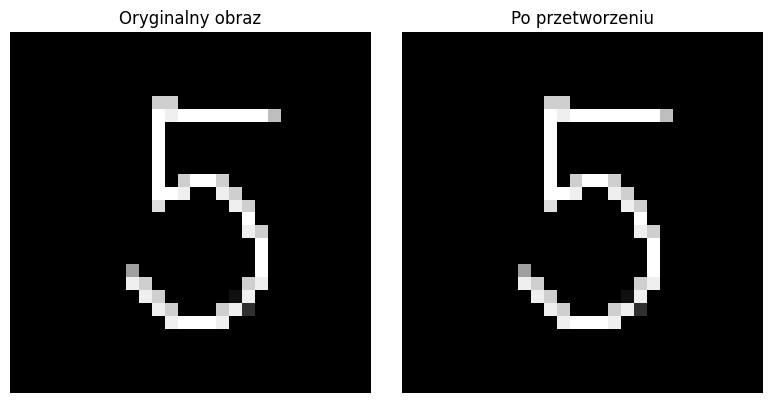

Model przewidział cyfrę: 5


In [176]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Wczytaj obraz z OpenCV
img = cv2.imread('28cyfra5.png', cv2.IMREAD_GRAYSCALE)

# Zmień rozmiar do 28x28 (jak w MNIST)
img_resized = cv2.resize(img, (28, 28))

# Normalizacja do zakresu [0,1]
img_normalized = img_resized / 255.0

# Dodaj wymiar batcha i kanału (model oczekuje 4D wejścia)
input_image = np.expand_dims(img_normalized, axis=0)  # (1, 28, 28)
input_image = np.expand_dims(input_image, axis=-1)    # (1, 28, 28, 1)

# Predykcja
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

# Pokaż oryginalny i przetworzony obraz
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Oryginalny obraz')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_normalized, cmap='gray')
plt.title('Po przetworzeniu')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Model przewidział cyfrę:", predicted_label)
